In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tldextract

# Load the data
file_path = "data/plotting/combined_c4_token_and_urlcounts.csv"
data = pd.read_csv(file_path)


def categorize_domain(domain):
    domain = domain.lower()
    domain_info = tldextract.extract(domain)
    domain_name = domain_info.domain

    news_keywords = ["news", "times", "post", "journal", "press", "daily", "tribune"]
    education_keywords = [
        "edu",
        "school",
        "college",
        "university",
        "academy",
        "institute",
    ]
    tech_keywords = ["tech", "gadget", "science", "digital", "innovation"]
    health_keywords = ["health", "medical", "clinic", "hospital", "wellness"]
    entertainment_keywords = [
        "entertainment",
        "movie",
        "music",
        "video",
        "film",
        "show",
        "theater",
    ]

    if any(keyword in domain_name for keyword in news_keywords):
        return "News/Media"
    elif any(keyword in domain_name for keyword in education_keywords):
        return "Education"
    elif any(keyword in domain_name for keyword in tech_keywords):
        return "Technology/Science"
    elif any(keyword in domain_name for keyword in health_keywords):
        return "Health"
    elif any(keyword in domain_name for keyword in entertainment_keywords):
        return "Entertainment"
    else:
        return "Other"


data["Domain Type"] = data["Domain"].apply(categorize_domain)

data = data[data["Paywall"] != "Unknown"]

sns.set(style="whitegrid", palette="muted", font_scale=1.2)


paywall_palette = sns.color_palette("autumn", 3)
advertising_palette = sns.color_palette("winter", 2)
modalities_palette = sns.color_palette("viridis", 6)

<Figure size 1800x1800 with 0 Axes>

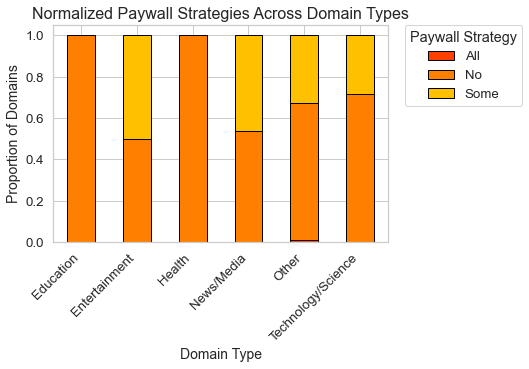

In [17]:
%matplotlib inline

# Normalize bar chart for paywall strategies
plt.figure(figsize=(25, 25))
service_type_cross = pd.crosstab(
    index=data["Domain Type"], columns=data["Paywall"], normalize="index"
)
service_type_cross.plot(
    kind="bar", stacked=True, color=paywall_palette, edgecolor="black"
)
plt.title("Normalized Paywall Strategies Across Domain Types", fontsize=16)
plt.xlabel("Domain Type", fontsize=14)
plt.ylabel("Proportion of Domains", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.legend(
    title="Paywall Strategy",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    borderaxespad=0.0,
)
plt.show()



<Figure size 864x576 with 0 Axes>

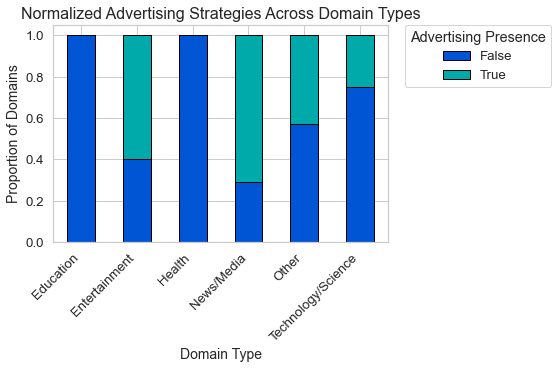

In [18]:

plt.figure(figsize=(12, 8))
service_type_advertising = pd.crosstab(
    index=data["Domain Type"], columns=data["Advertisements"], normalize="index"
)
service_type_advertising.plot(
    kind="bar", stacked=True, color=advertising_palette, edgecolor="black"
)
plt.title("Normalized Advertising Strategies Across Domain Types", fontsize=16)
plt.xlabel("Domain Type", fontsize=14)
plt.ylabel("Proportion of Domains", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.legend(
    title="Advertising Presence",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    borderaxespad=0.0,
)
plt.show()

<Figure size 1800x1800 with 0 Axes>

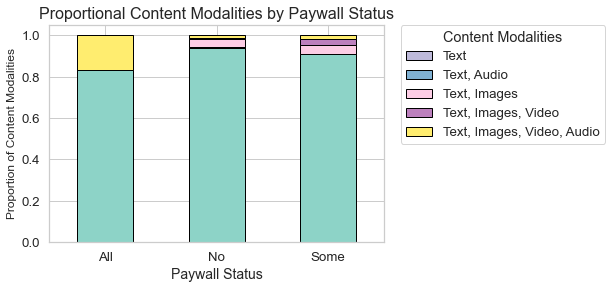

In [19]:


def determine_modalities(row):
    modalities = []
    if row["Content Modalities: Text"] in ["High", "Medium", "Low"]:
        modalities.append("Text")
    if row["Content Modalities: Images"] in ["High", "Medium", "Low"]:
        modalities.append("Images")
    if row["Content Modalities: Video"] in ["High", "Medium", "Low"]:
        modalities.append("Video")
    if row["Content Modalities: Audio"] in ["High", "Medium", "Low"]:
        modalities.append("Audio")
    return ", ".join(modalities)


data["Content Modalities"] = data.apply(determine_modalities, axis=1)
plt.figure(figsize=(25, 25))
modalities_cross = pd.crosstab(
    index=data["Paywall"], columns=data["Content Modalities"], normalize="index"
)
modalities_cross.plot(
    kind="bar", stacked=True,  colormap='Set3', edgecolor="black"
)
plt.title("Proportional Content Modalities by Paywall Status", fontsize=16)
plt.xlabel("Paywall Status", fontsize=14)
plt.ylabel("Proportion of Content Modalities", fontsize=12)
plt.xticks(rotation=0)
plt.legend(
    title="Content Modalities",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    borderaxespad=0.0,
)
plt.show()

<Figure size 864x576 with 0 Axes>

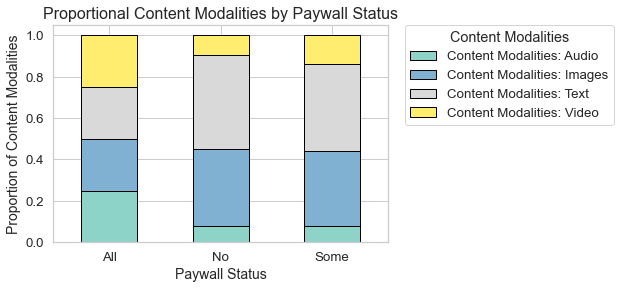

In [20]:

content_modalities = data.melt(
    id_vars=["Paywall"],
    value_vars=[
        "Content Modalities: Text",
        "Content Modalities: Images",
        "Content Modalities: Video",
        "Content Modalities: Audio",
    ],
    var_name="Content Modality",
    value_name="Level",
)
content_modalities["Level"] = content_modalities["Level"].apply(
    lambda x: "Yes" if x in ["High", "Medium"] else "No"
)
modalities_cross = pd.crosstab(
    index=content_modalities["Paywall"],
    columns=content_modalities["Content Modality"],
    normalize="index",
    values=content_modalities["Level"].apply(lambda x: 1 if x == "Yes" else 0),
    aggfunc="sum",
)


plt.figure(figsize=(12, 8))
modalities_cross.plot(kind="bar", stacked=True, colormap="Set3", edgecolor="black")
plt.title("Proportional Content Modalities by Paywall Status", fontsize=16)
plt.xlabel("Paywall Status", fontsize=14)
plt.ylabel("Proportion of Content Modalities", fontsize=14)
plt.xticks(rotation=0)
plt.legend(
    title="Content Modalities",
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    borderaxespad=0.0,
)
plt.show()

<ipython-input-44-fa3062b0cf07>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Domain Type", y="Total Tokens", data=avg_data, palette=domain_palette)
<ipython-input-44-fa3062b0cf07>:11: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.barplot(x="Domain Type", y="Total Tokens", data=avg_data, palette=domain_palette)


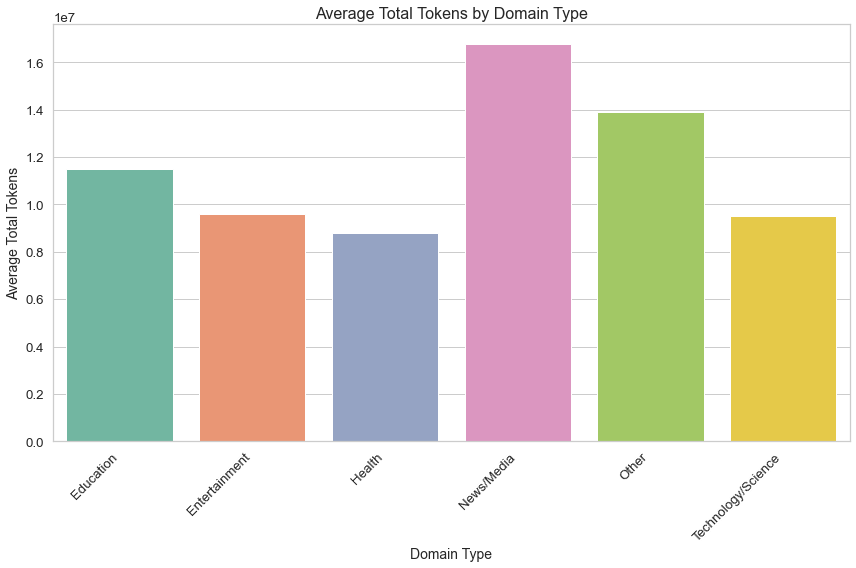

In [44]:
domain_palette = sns.color_palette("Set2")
advertising_palette = sns.color_palette("winter", 2)

avg_data = (
    data.groupby("Domain Type")[["Total Tokens", "URL Appearances"]]
    .mean()
    .reset_index()
)

plt.figure(figsize=(12, 8))
sns.barplot(x="Domain Type", y="Total Tokens", data=avg_data, palette=domain_palette)
plt.title("Average Total Tokens by Domain Type", fontsize=16)
plt.xlabel("Domain Type", fontsize=14)
plt.ylabel("Average Total Tokens", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

<ipython-input-48-d1283b3a041c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-48-d1283b3a041c>:4: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(


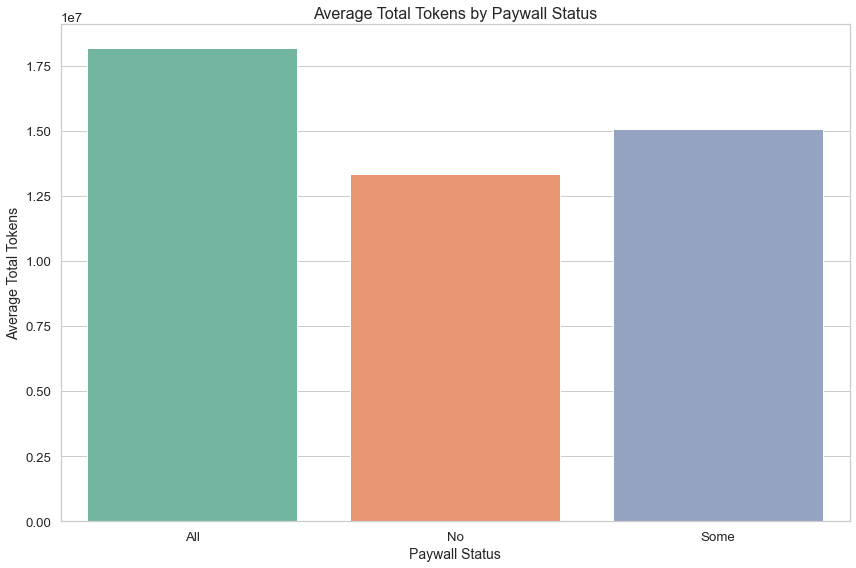

In [48]:
avg_tokens_paywall = data.groupby("Paywall")["Total Tokens"].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(
    x="Paywall", y="Total Tokens", data=avg_tokens_paywall, palette=domain_palette
)
plt.title("Average Total Tokens by Paywall Status", fontsize=16)
plt.xlabel("Paywall Status", fontsize=14)
plt.ylabel("Average Total Tokens", fontsize=14)
plt.tight_layout()
plt.show()

<ipython-input-47-f19f055e7ef6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-47-f19f055e7ef6>:6: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(


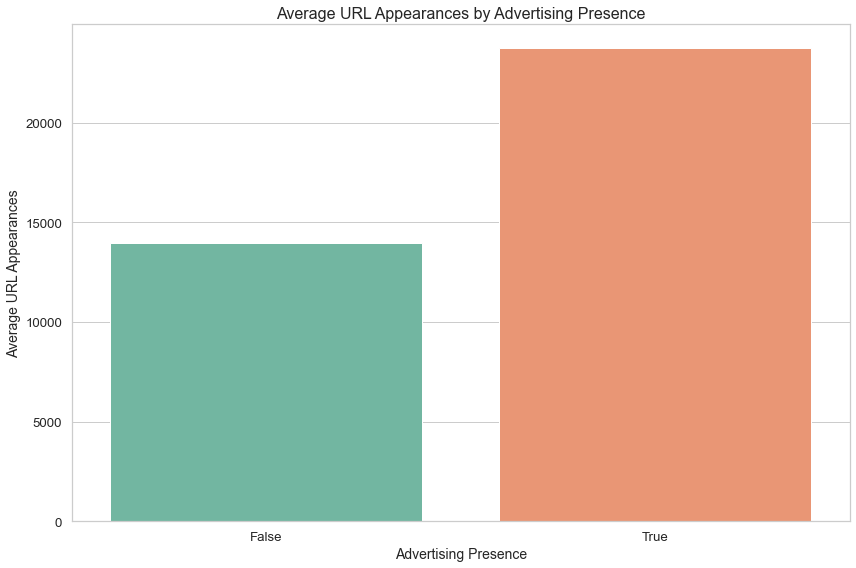

In [47]:
avg_urls_advertising = (
    data.groupby("Advertisements")["URL Appearances"].mean().reset_index()
)

plt.figure(figsize=(12, 8))
sns.barplot(
    x="Advertisements",
    y="URL Appearances",
    data=avg_urls_advertising,
    palette=domain_palette,
)
plt.title("Average URL Appearances by Advertising Presence", fontsize=16)
plt.xlabel("Advertising Presence", fontsize=14)
plt.ylabel("Average URL Appearances", fontsize=14)
plt.tight_layout()
plt.show()